<a href="https://colab.research.google.com/github/v5v5/data-science-plan/blob/main/%D0%9F%D1%80%D0%BE%D1%81%D1%82%D0%BE%20%D0%BE%20%D1%81%D0%BB%D0%BE%D0%B6%D0%BD%D0%BE%D0%B9%20%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B5%20%D0%B2%20Data%20Science%2013_04_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# День 2

Данные 

https://drive.google.com/file/d/1Mccq5uUsWbsDlSbmEsMer1U_IkxZXAyr/view?usp=sharing

Или

https://disk.yandex.com/d/-834NzVzgyKAaw



Источник
https://www.cryptodatadownload.com/data/bitfinex/

In [ ]:
import zipfile
with zipfile.ZipFile("/content/BitFinexData.zip", "r") as zipf:
  zipf.extractall("/content/bitfinex/")

In [ ]:
import pandas as pd
bitcoin = pd.read_csv("/content/bitfinex/Bitfinex_BTCUSD_d.csv", skiprows=1)[1:-750]
bitcoin["date"] = pd.to_datetime(bitcoin["date"])
bitcoin = bitcoin[::-1]
bitcoin = bitcoin.reset_index(drop=True)
bitcoin.head()

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,1488240000,2017-02-28,BTC/USD,1195.5,1216.0,1176.6,1189.1,16251499.88,13608.74
1,1488326400,2017-03-01,BTC/USD,1189.1,1236.4,1186.0,1233.2,20165589.45,16589.62
2,1488412800,2017-03-02,BTC/USD,1233.2,1285.9,1212.0,1258.0,26536494.73,21274.82
3,1488499200,2017-03-03,BTC/USD,1258.0,1294.9,1256.2,1289.2,20748814.46,16223.73
4,1488585600,2017-03-04,BTC/USD,1289.2,1291.9,1240.0,1267.8,14131545.81,11156.61


In [ ]:
bitcoin.head(3)

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,1488240000,2017-02-28,BTC/USD,1195.5,1216.0,1176.6,1189.1,16251499.88,13608.74
1,1488326400,2017-03-01,BTC/USD,1189.1,1236.4,1186.0,1233.2,20165589.45,16589.62
2,1488412800,2017-03-02,BTC/USD,1233.2,1285.9,1212.0,1258.0,26536494.73,21274.82


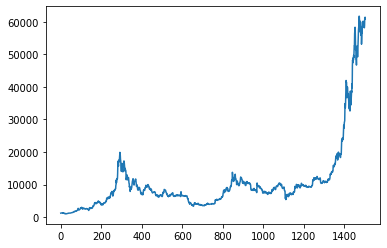

In [ ]:
bitcoin["high"].plot()

In [ ]:
bitcoin.shape

(1505, 9)

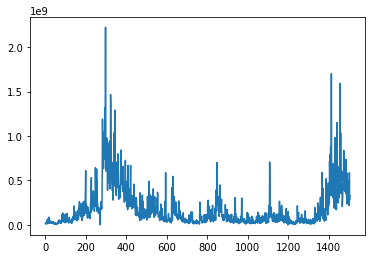

In [ ]:
bitcoin["Volume USD"].plot()


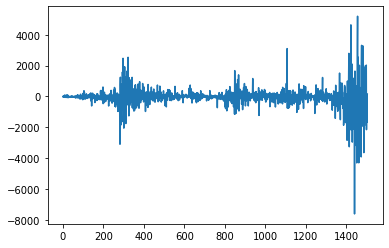

In [ ]:
(bitcoin["open"] - bitcoin["close"]).plot()

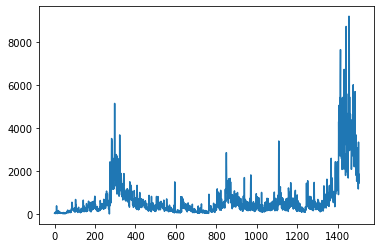

In [ ]:
(bitcoin["high"] - bitcoin["low"]).plot()

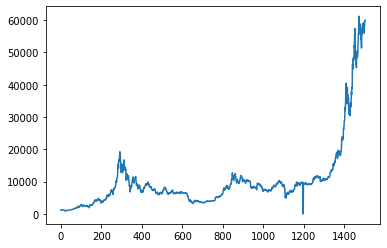

In [ ]:
(bitcoin["Volume USD"] / bitcoin["Volume BTC"]).plot()

In [ ]:
bitcoin["weekday"] = bitcoin["date"].dt.weekday
bitcoin["year"] = bitcoin["date"].dt.year
bitcoin["month"] = bitcoin["date"].dt.month

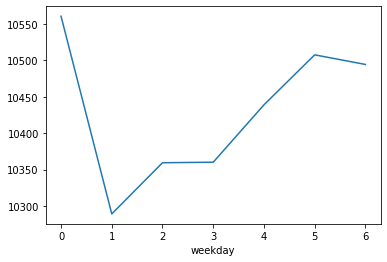

In [ ]:
bitcoin.groupby("weekday")["close"].mean().plot()

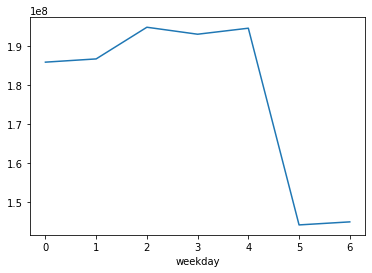

In [ ]:
bitcoin.groupby("weekday")["Volume USD"].mean().plot()

In [ ]:
bitcoin.head(3)

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC,weekday,year,month
0,1488240000,2017-02-28,BTC/USD,1195.5,1216.0,1176.6,1189.1,16251499.88,13608.74,1,2017,2
1,1488326400,2017-03-01,BTC/USD,1189.1,1236.4,1186.0,1233.2,20165589.45,16589.62,2,2017,3
2,1488412800,2017-03-02,BTC/USD,1233.2,1285.9,1212.0,1258.0,26536494.73,21274.82,3,2017,3


In [ ]:
# open - close — не имеет смысла 

In [ ]:
# (open-close) / (high-low) — имеет смысл
# volume USD - Volume BTC

In [ ]:
bitcoin["open2high"] = ((bitcoin["open"] - bitcoin["close"]) / (bitcoin["high"] - bitcoin["low"])).abs()

In [ ]:
for day in range(1,15):
  bitcoin[f"close_d{day}"] = bitcoin["close"].shift(day)


bitcoin["close_avg_2m"] = bitcoin["close"].shift(1).rolling(window=60).mean()
bitcoin.fillna(method="bfill", inplace=True)
bitcoin.drop(columns=["unix", "date", "symbol"], axis=1, inplace=True)

In [ ]:
bitcoin.head(15)

,open,high,low,close,Volume USD,Volume BTC,weekday,year,month,open2high,close_d1,close_d2,close_d3,close_d4,close_d5,close_d6,close_d7,close_d8,close_d9,close_d10,close_d11,close_d12,close_d13,close_d14,close_avg_2m
0,1195.5,1216.0,1176.6,1189.1,16251499.88,13608.74,1,2017,2,0.162437,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667
1,1189.1,1236.4,1186.0,1233.2,20165589.45,16589.62,2,2017,3,0.875000,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667
2,1233.2,1285.9,1212.0,1258.0,26536494.73,21274.82,3,2017,3,0.335589,1233.2,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667
3,1258.0,1294.9,1256.2,1289.2,20748814.46,16223.73,4,2017,3,0.806202,1258.0,1233.2,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667
4,1289.2,1291.9,1240.0,1267.8,14131545.81,11156.61,5,2017,3,0.412331,1289.2,1258.0,1233.2,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667
5,1267.8,1279.9,1245.0,1278.4,8495853.37,6711.15,6,2017,3,0.303725,1267.8,1289.2,1258.0,1233.2,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667
6,1278.4,1287.8,1268.0,1279.2,10069995.03,7875.30,0,2017,3,0.040404,1278.4,1267.8,1289.2,1258.0,1233.2,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667
7,1279.2,1282.0,1185.0,1232.4,35444302.78,28634.69,1,2017,3,0.482474,1279.2,1278.4,1267.8,1289.2,1258.0,1233.2,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667
8,1232.4,1243.6,1142.2,1150.0,41164704.13,34649.53,2,2017,3,0.812623,1232.4,1279.2,1278.4,1267.8,1289.2,1258.0,1233.2,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667
9,1150.0,1207.6,1136.0,1190.4,22985798.25,19542.81,3,2017,3,0.564246,1150.0,1232.4,1279.2,1278.4,1267.8,1289.2,1258.0,1233.2,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667


# Zagadka

In [ ]:
bitcoin.groupby("year")["Volume BTC"].mean()

year
2017    33214.560909
2018    34024.317507
2019    10810.209205
2020     7913.895480
2021    11224.572053
Name: Volume BTC, dtype: float64

In [ ]:
bitcoin.groupby("year")["Volume USD"].mean()

year
2017    1.856361e+08
2018    2.702091e+08
2019    8.061435e+07
2020    8.539509e+07
2021    5.009955e+08
Name: Volume USD, dtype: float64

In [ ]:
# Классификации - в качестве прогноза - один из известных заранее вариантов
# Регрессии — в качестве прогноза - какое-то число

In [ ]:
bitcoin = pd.get_dummies(bitcoin, columns=["weekday", "month", "year"])

In [ ]:
bitcoin.shape

(1505, 46)

In [ ]:
bitcoin.tail()

,open,high,low,close,Volume USD,Volume BTC,open2high,close_d1,close_d2,close_d3,close_d4,close_d5,close_d6,close_d7,close_d8,close_d9,close_d10,close_d11,close_d12,close_d13,close_d14,close_avg_2m,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2017,year_2018,year_2019,year_2020,year_2021
1500,55962.000000,58155.0,55714.0,58110.0,2.604657e+08,4482.287596,0.879967,55962.0,57991.0,59145.0,58240.239187,57020.000000,58959.000000,58724.000000,58796.000000,58840.0,57675.0,55780.0,55886.0,54993.0,51358.0,53038.114365,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1501,58110.000000,58880.0,57713.0,58134.0,2.179731e+08,3749.493697,0.020566,58110.0,55962.0,57991.0,59145.000000,58240.239187,57020.000000,58959.000000,58724.000000,58796.0,58840.0,57675.0,55780.0,55886.0,54993.0,53359.331031,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1502,58134.090643,61243.0,57900.0,59812.0,5.858312e+08,9794.542479,0.501917,58134.0,58110.0,55962.0,57991.000000,59145.000000,58240.239187,57020.000000,58959.000000,58724.0,58796.0,58840.0,57675.0,55780.0,55886.0,53554.164365,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1503,59817.073785,60722.0,59308.0,60032.0,2.789436e+08,4646.581998,0.151999,59812.0,58134.0,58110.0,55962.000000,57991.000000,59145.000000,58240.239187,57020.000000,58959.0,58724.0,58796.0,58840.0,57675.0,55780.0,53776.231031,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1504,60033.000000,61338.0,59492.0,59874.0,3.291828e+08,5497.925195,0.086132,60032.0,59812.0,58134.0,58110.000000,55962.000000,57991.000000,59145.000000,58240.239187,57020.0,58959.0,58724.0,58796.0,58840.0,57675.0,54029.414365,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
bitcoin["target"] = bitcoin["close"].shift(-1)
bitcoin.dropna(inplace=True)

# Учебник (тренировочная выборка / обучающая)
X_train = ?

y_train = ?

# Экзамен (тестовая выборка / проверочная)

X_test = ?

y_test = ?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:


X = bitcoin.drop("target", axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = bitcoin["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
cols = bitcoin.drop("target", axis=1).columns

In [ ]:
pd.DataFrame(data=[model.coef_], columns=cols).T

,0
open,50662.555545
high,-1224.996291
low,-16.935061
close,10757.679150
Volume USD,-1.606706
Volume BTC,12.124677
open2high,-7.270621
close_d1,-49830.891818
close_d2,1113.433901
close_d3,-589.659014


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score

TEST
MAE 337.76359006370996
MAX 6723.378918538052
R2 0.9953309043049192
TRAIN
MAE 327.11350907808503
MAX 6723.378918538088
R2 0.9968028618502663


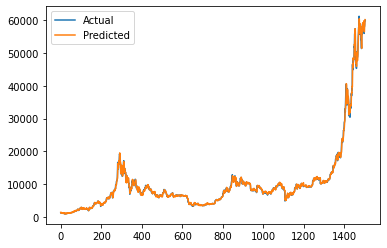

In [ ]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
plt.plot(y, label="Actual")
plt.plot(model.predict(X), label="Predicted")
plt.legend()
print("TEST")
print("MAE", mean_absolute_error(y_pred, y_test))
print("MAX", max_error(y_pred, y_test))
print("R2", r2_score(y_pred, y_test))


y_full_prediction = model.predict(X)
print("TRAIN")
print("MAE", mean_absolute_error(y_full_prediction, y))
print("MAX", max_error(y_full_prediction, y))
print("R2", r2_score(y_full_prediction, y))

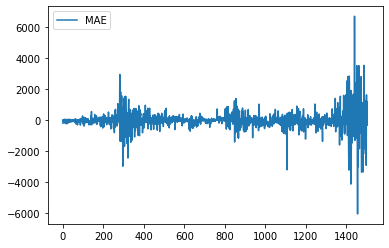

In [ ]:
plt.plot(y-model.predict(X), label="MAE")
plt.legend()

# День 3

GridSearch, Cross-val

Gradient Descent

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(random_state=42)

In [ ]:
param_grid = {
    "n_estimators" : [10, 50, 100, 500],
    "criterion" : ["mae", "mse"],
    "max_depth": [5, 15],
}

In [ ]:
4 * 2 * 2 * 3

48

Train/test

XXXXXXXXXXXXXXXXXXXXX****** - вчера
XXXXXXXXXXXXXXX************ - неплохо

СЛУЧАЙНО ПЕРЕМЕШАТЬ
XXXXXXXXXXXXXXX************

Кросс-валидация

XXXXXXXXXXXXXXXXXXXXX******
XXXXXXXXXXXXXXX******XXXXXX
XXXXXXXXX******XXXXXXXXXXXX
XXXX******XXXXXXXXXXXXXXXXX
******XXXXXXXXXXXXXXXXXXXXX










In [ ]:
from sklearn.model_selection import GridSearchCV
GS = GridSearchCV(model, param_grid, scoring="max_error", cv=3)
GS.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
GS.best_params_

{'criterion': 'mse', 'max_depth': 15, 'n_estimators': 50}

In [ ]:
GS.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
GS.best_score_

-4393.51884078907

In [ ]:
import pickle

In [ ]:
with open('best_random_forest.model', 'wb') as f:
    pickle.dump(GS.best_estimator_, f)

In [ ]:
f = open("best_random_forest.model", "rb")
loaded_model = pickle.load(f)

In [ ]:
loaded_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)